In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
np.random.seed(0)

cubagem_data = pd.DataFrame({

    'ID do Pacote': range(1, 101),
    'Peso': np.random.uniform(1, 50, 100),
    'Altura': np.random.uniform(10, 100, 100),
    'Largura': np.random.uniform(10, 100, 100),
    'Profundidade': np.random.uniform(10, 100, 100),
    'Tipo de Produto': np.random.choice(['Eletr√¥nicos', 'Farmac√™uticos', 'Vestu√°rio'], 100),
    'Fragilidade': np.random.choice([True, False], 100),
    'ID do Ve√≠culo': np.random.choice(['V1', 'V2', 'V3'], 100),
    'Capacidade do Ve√≠culo': np.random.choice([200, 300, 400], 100)

})


# Gerar dados para otimiza√ß√£o do tamanho de embalagens

np.random.seed(1)

embalagens_data = pd.DataFrame({

    'ID do Produto': range(1, 101),
    'Altura': np.random.uniform(5, 50, 100),
    'Largura': np.random.uniform(5, 50, 100),
    'Profundidade': np.random.uniform(5, 50, 100),
    'Peso do Produto': np.random.uniform(0.5, 25, 100),
    'Material de Embalagem': np.random.choice(['Papel√£o', 'Pl√°stico', 'Isopor'], 100),
    'Custo por Unidade de Material': np.random.uniform(0.1, 1.0, 100),
    'Volume de Vendas': np.random.randint(100, 1000, 100)

})


# Gerar dados para efici√™ncia na rota de entregas

np.random.seed(2)

entregas_data = pd.DataFrame({

    'ID da Entrega': range(1, 101),
    'ID do Ve√≠culo': np.random.choice(['V1', 'V2', 'V3', 'V4'], 100),
    'Local de Partida': np.random.choice(['CD1', 'CD2', 'CD3'], 100),
    'Destino da Entrega': np.random.choice(['Local A', 'Local B', 'Local C', 'Local D', 'Local E'], 100),
    'Dist√¢ncia': np.random.uniform(10, 300, 100),  # Dist√¢ncia em km
    'Tempo Estimado de Viagem': np.random.uniform(30, 240, 100),  # Tempo em minutos
    'Condi√ß√µes de Tr√°fego': np.random.choice(['Baixo', 'M√©dio', 'Alto'], 100)

})


# Exibir os primeiros registros

print("Embalagens Data:")
print(embalagens_data.head().to_markdown(index=False))

print("\nCubagem Data:")
print(cubagem_data.head().to_markdown(index=False))

print("\nEntregas Data:")
print(entregas_data.head().to_markdown(index=False))

Embalagens Data:
|   ID do Produto |   Altura |   Largura |   Profundidade |   Peso do Produto | Material de Embalagem   |   Custo por Unidade de Material |   Volume de Vendas |
|----------------:|---------:|----------:|---------------:|------------------:|:------------------------|--------------------------------:|-------------------:|
|               1 | 23.766   |   19.699  |        47.7579 |           20.3905 | Papel√£o                 |                        0.984176 |                567 |
|               2 | 37.4146  |   28.7176 |        30.0494 |           21.9366 | Papel√£o                 |                        0.339975 |                395 |
|               3 |  5.00515 |   44.8674 |        46.2023 |           17.3661 | Pl√°stico                |                        0.580288 |                966 |
|               4 | 18.605   |   21.0771 |        33.8705 |           14.4526 | Isopor                  |                        0.38302  |                227 |
|             

## Criando modelo para Maximiza√ß√£o da Cubagem de Ve√≠culos

In [ ]:
from ortools.linear_solver import pywraplp

def maximize_cubagem(vehicles, packages):
    """
    Maximiza a utiliza√ß√£o do espa√ßo nos ve√≠culos, solucionando um problema de empacotamento 3D.

    Args:
        vehicles: Lista de dicion√°rios com informa√ß√µes sobre os ve√≠culos (capacidade, dimens√µes).
        packages: Lista de dicion√°rios com informa√ß√µes sobre os pacotes (altura, largura, profundidade, peso).

    Returns:
        Solu√ß√£o do problema, indicando a posi√ß√£o de cada pacote em cada ve√≠culo.
    """

    solver = pywraplp.Solver.CreateSolver('SCIP')

    # Dimens√µes do problema
    num_vehicles = len(vehicles)
    num_packages = len(packages)

    # Vari√°veis de decis√£o: x[i, j] = 1 se o pacote i for colocado no ve√≠culo j, 0 caso contr√°rio
    x = {}
    for i in range(num_packages):
        for j in range(num_vehicles):
            x[i, j] = solver.IntVar(0, 1, f'x_{i}_{j}')

    # Fun√ß√£o objetivo: maximizar o volume total utilizado
    objective = solver.Objective()
    for i in range(num_packages):
        for j in range(num_vehicles):
            objective.SetCoefficient(x[i, j], packages[i]['volume'])
    objective.SetMaximization()

    # Restri√ß√µes:
    # 1. Cada pacote deve ser colocado em um √∫nico ve√≠culo
    for i in range(num_packages):
        solver.Add(sum(x[i, j] for j in range(num_vehicles)) == 1)

    # 2. Respeitar a capacidade de peso de cada ve√≠culo
    for j in range(num_vehicles):
        solver.Add(sum(packages[i]['peso'] * x[i, j] for i in range(num_packages)) <= vehicles[j]['capacidade_peso'])

    # 3. Respeitar a capacidade de volume de cada ve√≠culo (implementa√ß√£o simplificada, considerando apenas o volume total)
    # ... (implementar restri√ß√µes de volume considerando as dimens√µes 3D)

    # Resolver o problema
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print('Solu√ß√£o √≥tima encontrada!')
        # Imprimir a solu√ß√£o, indicando em qual ve√≠culo cada pacote foi colocado
        for i in range(num_packages):
            for j in range(num_vehicles):
                if x[i, j].solution_value() == 1:
                    print(f"Pacote {i} colocado no ve√≠culo {j}")
    else:
        print('Solu√ß√£o n√£o encontrada.')

    return status

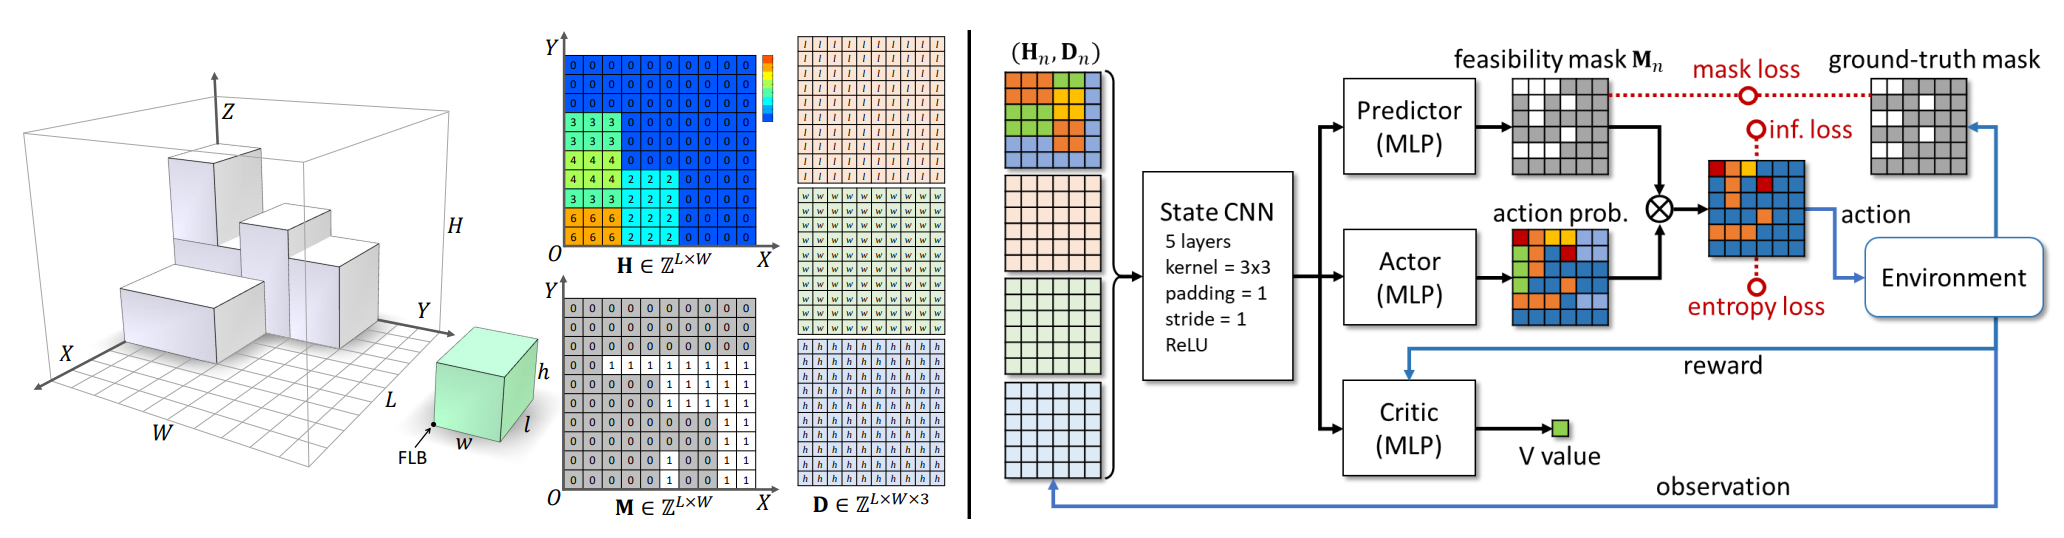

N√≥s fazemos as seguintes suposi√ß√µes:

* As caixas t√™m formato c√∫bico.
*  ordem das caixas n√£o √© conhecida a priori.
* Uma vez que uma caixa √© colocada, o agente n√£o pode mov√™-la.
* As caixas podem ser rotacionadas em ¬±90¬∞ apenas ao longo de tr√™s eixos.
* As dimens√µes s√£o inteiras (menor escala 1cm).
* O agente pode ver n caixas futuras.
* As caixas s√≥ podem ser colocadas em um local se todos os cantos estiverem no * mesmo n√≠vel (chamado de viabilidade).
* Uma caixa n√£o pode ser colocada abaixo de uma caixa j√° colocada.
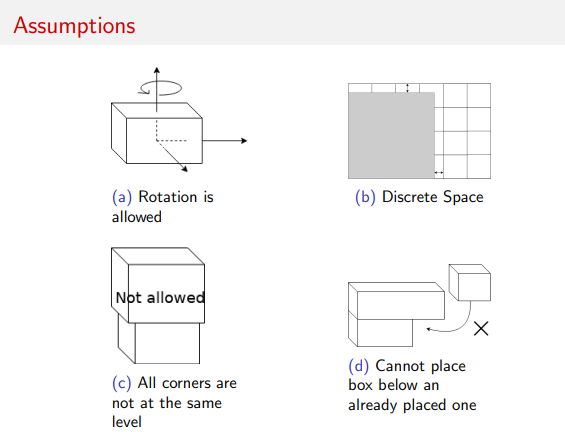

N√≥s denotamos alguns termos b√°sicos de aprendizado por refor√ßo usados.

* S: Estado
* A: A√ß√£o
* R: Recompensa
* œÄ(s) ou œÄ: Fun√ß√£o que mapeia estados para a√ß√µes
* Q(s, a): Fun√ß√£o de valor Q ou fun√ß√£o de valor de a√ß√£o, que √© a recompensa esperada se o agente estiver no estado (s) e tomar a a√ß√£o (a)
* N√≥s tentamos maximizar a recompensa esperada.

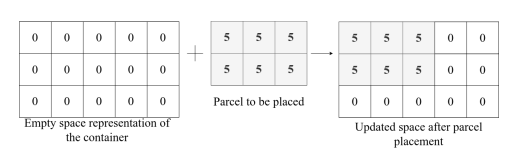

**Primeiro passo**: Coloque as caixas no primeiro local vi√°vel encontrado, varrendo do canto superior esquerdo do cont√™iner. Se n√£o forem encontrados locais vi√°veis nos cont√™ineres atualmente usados, a orienta√ß√£o da caixa √© alterada e a pesquisa √© executada novamente.

**Floor Building**: tenta embalar o cont√™iner camada por camada, do ch√£o para cima. Portanto, procura efetivamente por posi√ß√µes com a menor altura h poss√≠vel.

**Column Building**: tenta construir torres de caixas com a maior coordenada h vi√°vel no cont√™iner. Mas n√£o √© est√°vel do ponto de vista da empilhabilidade do rob√¥.

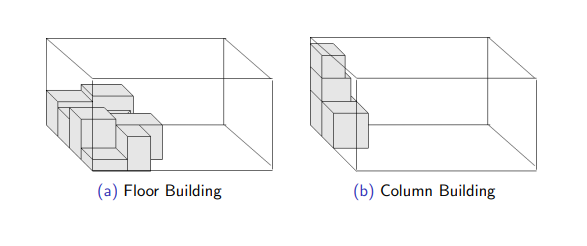

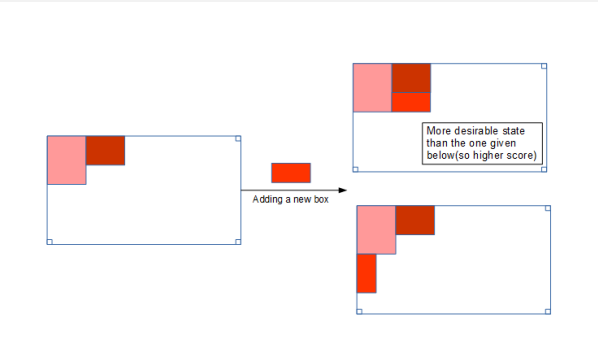

**A an√°lise das informa√ß√µes apresentadas demonstra que a cria√ß√£o de um modelo de cubagem capaz de atender √†s necessidades de forma r√°pida e precisa √© um desafio complexo. A aus√™ncia de detalhes sobre os caminh√µes, as caixas e a defini√ß√£o de regras espec√≠ficas impede a constru√ß√£o de um modelo robusto e confi√°vel. Para alcan√ßar resultados satisfat√≥rios em um ambiente real, seria imprescind√≠vel coletar dados mais precisos e aprofundar a an√°lise dos requisitos do sistema.**

## Otimiza√ß√£o do Tamanho de Embalagens

O problema envolve a defini√ß√£o de embalagens otimizadas para cada produto, minimizando:

* Custo de material: baseado no custo por unidade do material e no volume da embalagem.
* Custo de transporte: impactado pelo volume e peso da embalagem.

Vamos considerar que a embalagem deve ser suficientemente grande para acomodar o produto, por√©m, n√£o muito maior para evitar desperd√≠cio. O custo total ser√° uma combina√ß√£o dos custos de material e transporte.

 * Volume do Produto: ùëâùëù=ùê¥ùëôùë°ùë¢ùëüùëé√óùêøùëéùëüùëîùë¢ùëüùëé√óùëÉùëüùëúùëìùë¢ùëõùëëùëñùëëùëéùëëùëí

 * Volume da Embalagem: Ve =(Altura+X)√ó(Largura+Y)√ó(Profundidade+Z)

 * Custo material da embalagem: Cm=Custo¬†por¬†unidade¬†de¬†material √ó Ve


Considerando que o custo de transporte pode ser influenciado diretamente pelo peso total da embalagem (produto + embalagem), uma fun√ß√£o linear do peso pode ser usada.
 * Peso total: Pt=Peso¬†do¬†Produto+Peso¬†da¬†Embalagem.

### Restri√ß√µes

* A embalagem deve ser suficientemente grande para caber o produto, ou seja
 * Altura embalagem ‚â•Altura produto
 * Largura embalagem ‚â•Largura produto
 * Profundidade embalagem ‚â•Profundidade produto


In [4]:
from scipy.optimize import minimize

# Criar dataframe a partir dos dados
df = pd.DataFrame(embalagens_data)

# Fun√ß√£o para calcular o volume de um produto
def calcular_volume(altura, largura, profundidade):
    return altura * largura * profundidade

# Fun√ß√£o de custo que ser√° minimizada
def funcao_custo(margens, altura_prod, largura_prod, profundidade_prod, custo_material):
    margem_altura, margem_largura, margem_profundidade = margens

    # Calcular volume da embalagem (produto + margem)
    altura_emb = altura_prod + margem_altura
    largura_emb = largura_prod + margem_largura
    profundidade_emb = profundidade_prod + margem_profundidade

    volume_embalagem = altura_emb * largura_emb * profundidade_emb

    # Calcular o custo de material da embalagem
    custo_embalagem = volume_embalagem * custo_material

    # Assumindo um custo de transporte proporcional ao volume (pode-se ajustar)
    custo_transporte = volume_embalagem * 0.1  # custo fict√≠cio de transporte por volume

    return custo_embalagem + custo_transporte

# Fun√ß√£o para otimizar a embalagem de cada produto
def otimizar_embalagem(altura_prod, largura_prod, profundidade_prod, custo_material):
    # Condi√ß√µes iniciais para as margens (arbitr√°rias, come√ßar com 2 cm em cada dire√ß√£o)
    margens_iniciais = [2.0, 2.0, 2.0]

    # Restri√ß√µes: margens devem ser positivas
    bounds = [(0.5, 10.0), (0.5, 10.0), (0.5, 10.0)]  # margens entre 0.5 cm e 10 cm

    # Usar o m√©todo de otimiza√ß√£o 'minimize' para minimizar o custo
    resultado = minimize(
        funcao_custo,
        margens_iniciais,
        args=(altura_prod, largura_prod, profundidade_prod, custo_material),
        bounds=bounds,
        method='L-BFGS-B'
    )

    return resultado.x, resultado.fun  # Retorna as margens otimizadas e o custo

# Loop pelos produtos e otimizar suas embalagens
resultados = []
for i, row in df.iterrows():
    altura_prod = row["Altura"]
    largura_prod = row["Largura"]
    profundidade_prod = row["Profundidade"]
    custo_material = row["Custo por Unidade de Material"]

    margens_otimizadas, custo_total = otimizar_embalagem(
        altura_prod, largura_prod, profundidade_prod, custo_material
    )

    resultados.append({
        "ID do Produto": row["ID do Produto"],
        "Margem Altura": margens_otimizadas[0],
        "Margem Largura": margens_otimizadas[1],
        "Margem Profundidade": margens_otimizadas[2],
        "Custo Total Otimizado": custo_total
    })

# Exibir os resultados finais
resultados_df = pd.DataFrame(resultados)
print(resultados_df)

    ID do Produto  Margem Altura  Margem Largura  Margem Profundidade  \
0               1            0.5             0.5                  0.5   
1               2            0.5             0.5                  0.5   
2               3            0.5             0.5                  0.5   
3               4            0.5             0.5                  0.5   
4               5            0.5             0.5                  0.5   
..            ...            ...             ...                  ...   
95             96            0.5             0.5                  0.5   
96             97            0.5             0.5                  0.5   
97             98            0.5             0.5                  0.5   
98             99            0.5             0.5                  0.5   
99            100            0.5             0.5                  0.5   

    Custo Total Otimizado  
0            25644.642431  
1            14889.553898  
2             7934.940981  
3          

Cada linha do DataFrame final cont√©m as margens otimizadas de altura, largura e profundidade, al√©m do custo total otimizado para cada produto.

 Calcula o volume do produto a partir das dimens√µes de altura, largura e profundidade.

  Calcula o custo total de uma embalagem, considerando o custo do material da embalagem e um custo de transporte (fict√≠cio). A fun√ß√£o leva em considera√ß√£o as margens de prote√ß√£o

  Usa a fun√ß√£o minimize da biblioteca scipy.optimize para otimizar as margens (espa√ßo adicional para embalar o produto), com o objetivo de minimizar o custo total (material + transporte).

Para cada produto no DataFrame, otimiza as dimens√µes da embalagem, retornando as margens otimizadas e o custo total.

Os resultados s√£o armazenados em um novo DataFrame e exibidos, mostrando as margens otimizadas e o custo total para cada produto.

### **Poss√≠veis Melhorias**:
* Ajustar a fun√ß√£o de custo de transporte para considerar vari√°veis mais realistas, como peso, volume ou rotas de transporte.
* Incluir outras restri√ß√µes espec√≠ficas, como robustez da embalagem para transporte seguro.

## Efici√™ncia na Rota de Entregas

### **Defini√ß√£o do Problema**
O problema consiste em minimizar o tempo e o custo de entrega, levando em considera√ß√£o:

* Dist√¢ncia: A dist√¢ncia entre o local de partida e o destino da entrega.
Tempo Estimado de Viagem: O tempo estimado pode ser influenciado pelas condi√ß√µes de tr√°fego.
* Condi√ß√µes de Tr√°fego: O tr√°fego pode ser Alto, M√©dio ou Baixo, e isso deve afetar o tempo total.

Modelo de Otimiza√ß√£o
nosso objetivo √© minimizar uma fun√ß√£o de custo que combina o tempo de viagem com uma penaliza√ß√£o por tr√°fego. Podemos ajustar o tempo estimado de viagem com base nas condi√ß√µes de tr√°fego para criar um fator de corre√ß√£o.

F√≥rmula geral para o tempo ajustado:
* Tempo¬†Ajustado=Tempo¬†Estimado¬†de¬†Viagem√ó(1+Fator¬†de¬†Trafego)

Onde:

* Tr√°fego Alto: Fator¬†de¬†Trafego=0.3 (30% mais lento),
* Tr√°fego M√©dio: Fator¬†de¬†Trafego=0.15(15% mais lento),
* Tr√°fego Baixo: Fator¬†de¬†Trafego=0 (sem atraso).

In [5]:
import pandas as pd
from scipy.optimize import linprog

# Criar dataframe a partir dos dados
df = pd.DataFrame(entregas_data)

# Definir fatores de tr√°fego
fatores_trafego = {
    "Alto": 0.3,   # 30% mais lento
    "M√©dio": 0.15,  # 15% mais lento
    "Baixo": 0.0   # Sem atraso
}

# Fun√ß√£o para calcular o tempo ajustado com base no tr√°fego
def calcular_tempo_ajustado(tempo_estimado, condicao_trafego):
    fator = fatores_trafego[condicao_trafego]
    return tempo_estimado * (1 + fator)

# Adicionar coluna de tempo ajustado no DataFrame
df['Tempo Ajustado'] = df.apply(lambda row: calcular_tempo_ajustado(row['Tempo Estimado de Viagem'], row['Condi√ß√µes de Tr√°fego']), axis=1)

# Mostrar os dados com tempo ajustado
print("Dados com tempo ajustado:")
print(df[['ID da Entrega', 'ID do Ve√≠culo', 'Local de Partida', 'Destino da Entrega', 'Tempo Estimado de Viagem', 'Tempo Ajustado']])

# Otimiza√ß√£o Linear para determinar a rota de menor tempo total
# No exemplo simples, vamos somar os tempos ajustados para todas as rotas e escolher o menor
# Pode ser expandido para mais ve√≠culos e destinos diferentes

# Fun√ß√£o de otimiza√ß√£o de rota para minimizar o tempo total
def otimizar_rotas(df):
    # Agrupar por ve√≠culo e calcular o tempo total ajustado
    tempos_totais = df.groupby('ID do Ve√≠culo')['Tempo Ajustado'].sum().reset_index()
    tempos_totais = tempos_totais.rename(columns={'Tempo Ajustado': 'Tempo Total'})

    # A melhor rota √© a que tem o menor tempo total
    melhor_rota = tempos_totais.loc[tempos_totais['Tempo Total'].idxmin()]

    return melhor_rota

# Otimizar as rotas e encontrar a melhor
melhor_rota = otimizar_rotas(df)
print("\nMelhor rota otimizada:")
print(melhor_rota)

Dados com tempo ajustado:
    ID da Entrega ID do Ve√≠culo Local de Partida Destino da Entrega  \
0               1            V1              CD3            Local E   
1               2            V4              CD1            Local C   
2               3            V2              CD3            Local A   
3               4            V1              CD2            Local D   
4               5            V3              CD1            Local D   
..            ...           ...              ...                ...   
95             96            V2              CD2            Local D   
96             97            V3              CD1            Local A   
97             98            V2              CD2            Local A   
98             99            V3              CD2            Local A   
99            100            V3              CD2            Local C   

    Tempo Estimado de Viagem  Tempo Ajustado  
0                 129.517510      168.372763  
1                 150.6337



Calcula o tempo ajustado para cada rota, considerando o tempo estimado de viagem e as condi√ß√µes de tr√°fego. O fator de tr√°fego aumenta o tempo de viagem com base nas condi√ß√µes de tr√°fego ("Alto", "M√©dio", "Baixo").

Uma nova coluna √© criada no DataFrame com os tempos ajustados para cada entrega.

Calcula o tempo total ajustado para cada ve√≠culo. A rota ideal ser√° aquela em que o ve√≠culo tem o menor tempo total de entrega.

O c√≥digo imprime as rotas com os tempos ajustados e indica qual ve√≠culo tem o tempo total mais eficiente.

## **Implementa√ß√£o e Teste**

1. Modelo de Capacidade dos Ve√≠culos:

Ao considerar a capacidade dos ve√≠culos, √© necess√°rio garantir que cada ve√≠culo seja capaz de carregar todas as entregas atribu√≠das a ele. Isso requer modelar tanto o peso quanto a cubagem (volume) de cada carga. Podemos usar restri√ß√µes de capacidade para garantir que a soma do peso e volume das entregas n√£o exceda os limites do ve√≠culo.

2. Modelo de Maximiza√ß√£o de Cubagem



A cubagem (ou o uso eficiente do espa√ßo no ve√≠culo) √© um fator importante para otimizar as rotas de entrega. O modelo de cubagem visa maximizar a utiliza√ß√£o do espa√ßo dispon√≠vel no ve√≠culo, minimizando o espa√ßo vazio. Para isso, definimos um coeficiente de efici√™ncia da cubagem ùê∏cubagem, que mede o qu√£o bem o volume dispon√≠vel do ve√≠culo √© utilizado.

3. Integra√ß√£o do Modelo em um Ambiente Real:

A implementa√ß√£o do modelo em um ambiente operacional real envolve os seguintes passos:
* Integra√ß√£o com o Sistema de Gest√£o de Transporte (TMS): O modelo de otimiza√ß√£o ser√° integrado ao TMS da empresa, que cont√©m informa√ß√µes sobre ve√≠culos, pedidos e rotas. O TMS ser√° respons√°vel por fornecer dados em tempo real sobre:

 * Localiza√ß√µes de partida e destino.
 * Condi√ß√µes de tr√°fego e estradas.
 * Capacidade dos ve√≠culos em termos de peso e volume.
 * Informa√ß√µes sobre pedidos (dimens√µes, peso, volume).

* O modelo, integrado ao TMS, calcular√° as rotas otimizadas e atribuir√° ve√≠culos √†s rotas com base nas restri√ß√µes de capacidade e cubagem.

* Valida√ß√£o do Modelo

* Testes Piloto: Implementar testes piloto em uma pequena parte da frota, comparando os resultados com as opera√ß√µes atuais. Ser√£o observados aspectos como:
 * Tempo total de entrega.
 * Utiliza√ß√£o de capacidade e cubagem dos ve√≠culos.
 * Custos operacionais (combust√≠vel, manuten√ß√£o, horas de trabalho).



4. Valida√ß√£o da Efic√°cia:

A efic√°cia do modelo ser√° validada comparando os resultados otimizados com os dados hist√≥ricos de entregas. As principais m√©tricas a serem analisadas incluem:

* Redu√ß√£o no Tempo Total de Entrega: Comparar o tempo de entrega otimizado com as opera√ß√µes anteriores.
* Redu√ß√£o de Custos Operacionais: Analisar os custos de combust√≠vel, manuten√ß√£o e desgaste dos ve√≠culos ap√≥s a implementa√ß√£o do modelo.
* Aumento da Efici√™ncia de Cubagem: Monitorar o quanto o modelo maximiza a utiliza√ß√£o do espa√ßo dispon√≠vel nos ve√≠culos.
* Conformidade com Restri√ß√µes de Capacidade: Validar se os ve√≠culos nunca ultrapassam a capacidade de peso e volume.




## **Monitoramento**

Ap√≥s a implementa√ß√£o, o desempenho do modelo precisaria ser monitorado continuamente para garantir que ele esteja funcionando de forma eficiente e adaptado a mudan√ßas no ambiente de opera√ß√£o .

1. M√©tricas de Monitoramento:

As principais m√©tricas para monitorar o desempenho do modelo incluem:

* Tempo M√©dio de Entrega:

 * Monitorar o tempo m√©dio de entrega de todas as rotas.
 * Comparar o tempo m√©dio de entrega ap√≥s a implementa√ß√£o do modelo com dados hist√≥ricos.
* Efici√™ncia de Cubagem:

 * Acompanhar a utiliza√ß√£o do espa√ßo em cada ve√≠culo.
 * Avaliar a propor√ß√£o de ve√≠culos com alta utiliza√ß√£o de cubagem (ex: acima de 85% de ocupa√ß√£o).
* Custo de Combust√≠vel por Rota:

 * Monitorar o consumo de combust√≠vel em cada rota.
 * Avaliar se houve redu√ß√£o nos custos de combust√≠vel devido √† otimiza√ß√£o de rotas mais curtas ou menos tempo em tr√¢nsito.
* Cumprimento dos Prazos de Entrega:

 * Acompanhar o percentual de entregas que chegam no prazo.
 * Analisar o impacto das condi√ß√µes de tr√°fego nos prazos de entrega.
* Uso da Capacidade de Peso:

 * Verificar se os ve√≠culos est√£o sendo carregados adequadamente sem ultrapassar a capacidade de peso.
* Rotas Eficientes vs Ineficientes:

 * Identificar as rotas que ainda apresentam problemas de efici√™ncia ap√≥s a otimiza√ß√£o, como tempos de viagem muito altos ou baixa utiliza√ß√£o de cubagem.




2. Alertas e Ajustes em Tempo Real:

O modelo ser√° ajustado em tempo real com base nas seguintes situa√ß√µes:

* Mudan√ßas nas Condi√ß√µes de Tr√°fego: Caso haja um aumento no tr√°fego em determinadas rotas, o sistema ajustar√° automaticamente os c√°lculos de tempo e sugerir√° alternativas.
* Sobrecarga de Ve√≠culos: Se for detectada uma sobrecarga de peso ou volume no ve√≠culo, o sistema redistribuir√° as cargas para outros ve√≠culos.
* Falhas Operacionais: Caso algum ve√≠culo tenha falha mec√¢nica, o sistema recalcular√° as rotas para reatribuir as entregas pendentes a outros ve√≠culos.




3. Relat√≥rios e Pain√©is de Desempenho

Para garantir o monitoramento cont√≠nuo do desempenho, ser√£o gerados relat√≥rios peri√≥dicos com base nas m√©tricas mencionadas. Pain√©is (dashboards) em tempo real poder√£o ser utilizados para visualizar:

* Roteiros ativos.
* Tempo m√©dio de entrega por rota.
* Utiliza√ß√£o da cubagem e da capacidade dos ve√≠culos.
* Custos operacionais em tempo real (combust√≠vel, horas trabalhadas).






4. Ajuste Cont√≠nuo do Modelo

* Treinamento Cont√≠nuo: O modelo ser√° ajustado e re-treinado conforme novos dados de entrega, condi√ß√µes de tr√°fego e informa√ß√µes dos ve√≠culos forem coletados.
* Feedback do Operador: Feedback dos motoristas e operadores log√≠sticos ser√° coletado para identificar problemas com rotas otimizadas, garantindo que o modelo seja pr√°tico e eficiente.

## **Conclus√£o**

A implementa√ß√£o do modelo de Otimiza√ß√£o de Rotas de Entrega com restri√ß√µes de capacidade de ve√≠culos e maximiza√ß√£o de cubagem pode gerar ganhos significativos em termos de custo, tempo de entrega e efici√™ncia operacional. O monitoramento cont√≠nuo das m√©tricas garantir√° que o modelo mantenha a efic√°cia em um ambiente din√¢mico, ajustando-se em tempo real para oferecer a melhor solu√ß√£o log√≠stica.